# Praktikum V

Selamat datang pada praktikum unggulan minggu ke - 5. 

Materi praktikum ini dibagi menjadi 2 bagian dengan menggunakan dua dataset yang berbeda. Adapun operasi akan Anda lakukan antara lain 
* Melihat bentuk data (shape) dari data train dan test set
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb
* Melakukan konversi jenis kolom yang relevan.
* Melakukan transformasi terhadap data yang bersifat kategori 

Operasi yang Anda lakukan pada tahapan pembersihan data sangat bergantung pada karakteristik permasalahan, karakter data, serta jenis data yang terdapat dalam dataset Anda. Sebagai referensi, berikut bagan dari berbagai macam tipe data yang mungkin Anda temui dalam sebuah dataset. 

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2. 
* Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?
* Ganti kolom hours-per-week dengan nama hoursPerWeek
* Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?  

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset 2

In [2]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv",na_values="?")

In [3]:
data.shape

(48842, 15)

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.describe

<bound method NDFrame.describe of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18           NaN  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Ma

#### Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2.

In [6]:
data.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [7]:
C = (data.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (data.dtypes == 'int64') 
Float   = (data.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (data.isnull().sum()).sum()/np.product(data.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.88244 %


In [8]:
data = data.drop(data[data.isnull().any(1)].index, axis = 0)

In [9]:
data.shape

(45222, 15)


#### Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?

In [10]:
data.race.unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

array([<AxesSubplot:title={'center':'<=50K'}>,
       <AxesSubplot:title={'center':'>50K'}>], dtype=object)

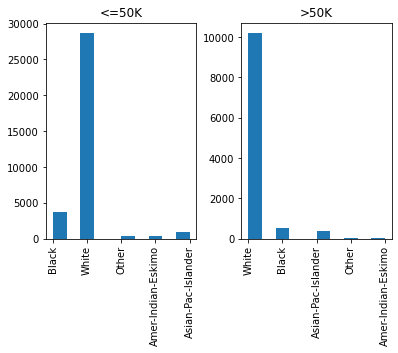

In [11]:
data.hist(column='race',by='income')

Dapat disimpulkan bahwa ras yang mendominasi pendapat dibawah 50k adalah orang kulit hitam sedangkan ras yang mendominasi pendapata diatas 50k merupakan orang kulit putih

#### Ganti kolom hours-per-week dengan nama hoursPerWeek

In [12]:
data_renamed_cols = data.rename({'hours-per-week':'hoursPerWeek'}, axis=1)
data_renamed_cols.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hoursPerWeek,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#### Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?

In [13]:
races = data_renamed_cols.race.unique()

for race in races:
  print('{} : {} Orang'.format(race, data_renamed_cols['race'][data_renamed_cols.race == race ][data_renamed_cols['hoursPerWeek']>40].count()))

Black : 654 Orang
White : 12654 Orang
Other : 65 Orang
Amer-Indian-Eskimo : 101 Orang
Asian-Pac-Islander : 303 Orang
